# Tracer simulation results

* A notebook shows my NEMO run, frequently changing.

#Content
1. [**Boundary + Initial + Source**](#Boundary-+-Initial-+-Source)

In [1]:
import sys
sys.path.insert(0, '_libs/')

In [21]:
import glob
import scipy.io
import numpy as np
import netCDF4 as nc
import NEMO_tools as Nts
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.basemap import Basemap
% matplotlib inline

In [3]:
RB=[0.25, 0.41, 0.88]    # Royal blue
AM=[0.90, 0.17, 0.31]    # Amathran

#Boundary + Initial + Source

```fortran
IF( kt < 10 ) THEN
   trn(:, :, :, jpmyt1) = 40.0
ENDIF
```

In [5]:
filename=glob.glob('_data/IC_BC*.nc')
print(filename)

['_data\\IC_BC_3yrs_1m_00010101_00031231_grid_T.nc', '_data\\IC_BC_3yrs_1m_00010101_00031231_grid_U.nc', '_data\\IC_BC_3yrs_1m_00010101_00031231_grid_V.nc', '_data\\IC_BC_3yrs_1m_00010101_00031231_ptrc_T.nc']


In [29]:
ptrc_obj = nc.Dataset(filename[-1])
Ba=ptrc_obj.variables['Ba'][:]*1e-6
nav_lat=ptrc_obj.variables['nav_lat'][:]
nav_lon=ptrc_obj.variables['nav_lon'][:]
#u_obj = nc.Dataset(filename[1])
#U = u_obj.variables['vozoeivu'][:]
#v_obj = nc.Dataset(filename[2])
#V = v_obj.variables['vomecrty'][:]

In [30]:
#boundary_name=glob.glob('_data/Exchange/Ba_boundary.mat')
#Boundary_Mat=scipy.io.loadmat(boundary_name[0])
#Ba_boundary=Boundary_Mat['Ba_boundary'][120:, :]

In [31]:
Ba[Ba==0]=np.nan
nav_lon = nav_lon[120:, :]
nav_lat = nav_lat[120:, :]
diff_Ba = Ba[-1, 0, :, :]-50.0
diff_Ba = diff_Ba[120:, :]
#hit = Nts.find_inland(nav_lon, nav_lat)
diff_Ba_masked = np.ma.masked_where(np.isnan(diff_Ba), diff_Ba)

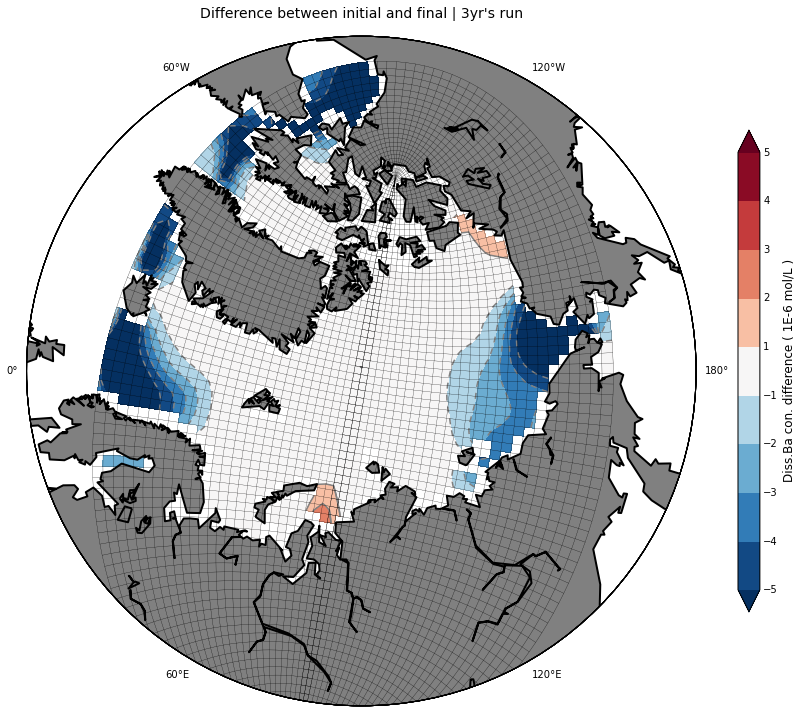

In [33]:
lev = [-5, -4, -3, -2, -1, 1, 2, 3, 4, 5]

fig = plt.figure(figsize=(15, 15))
ax = fig.gca()
#
proj=Basemap(projection='npstere', resolution='c', boundinglat=55, lon_0=90, round=True, ax=ax)
proj.drawmeridians(np.arange(0, 360, 60), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None)
proj.drawcoastlines(linewidth=2.0, linestyle='-', color='k')
x, y=proj(nav_lon, nav_lat)
# Ba
CS=proj.contourf(x, y, diff_Ba_masked, lev, cmap=plt.cm.RdBu_r, extend='both')
proj.contour(x, y, diff_Ba_masked, lev, linewidths=1.5, colors=('gray',))
# Frame
proj.plot(x, y, 'k-', linewidth=0.25); proj.plot(x.T, y.T, 'k-', linewidth=0.25)
# Legend
CBar = plt.colorbar(CS, shrink=0.575)
CBar.set_label('Diss.Ba con. difference ( 1E-6 mol/L )', fontsize=12)
CBar.ax.tick_params(axis='y', length=0)
ax.set_title("Difference between initial and final | 3yr's run", fontsize=14, y=1.02)